Fancy-pants plots for the paper.

In [1]:
data_file = './human_and_llm_annotated_data.csv'

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from PIL import Image

In [3]:
df_in = pd.read_csv(data_file)
df_in.head()

,annotators,image file,Human nGaussians,Human median (number),Human median (draw),Ground Truth nGaussians,Ground Truth Median,Ground Truth nBars,LLM Median,LLM Median Mini,LLM nGaussians (int),LLM nGaussians (int) Mini
0,annotator1,id_0041.jpeg,1,0.055,0.055269,1,0.054428,50,0.055,0.050,1,1
1,annotator1,id_0014.jpeg,3,0.450,0.457472,1,0.478811,50,0.490,0.485,1,1
2,annotator1,id_0028.jpeg,2,-0.420,-0.415863,2,-0.417302,45,-0.430,-0.420,1,1
3,annotator1,id_0057.jpeg,2,-0.700,-0.707283,2,-0.758364,50,-0.600,-0.600,2,2
4,annotator1,id_0020.jpeg,1,-0.200,-0.171428,1,-0.178007,50,0.000,-0.060,1,1


In [4]:
# do some cleaning for any "weird" LLM annotations
df_in[ (df_in['LLM Median'] < -1.0) | (df_in['LLM Median'] > 1.0) ] # outside range of plotted data

,annotators,image file,Human nGaussians,Human median (number),Human median (draw),Ground Truth nGaussians,Ground Truth Median,Ground Truth nBars,LLM Median,LLM Median Mini,LLM nGaussians (int),LLM nGaussians (int) Mini
16,annotator1,id_0032.jpeg,2,0.05,0.017290,2,0.050623,50,105.0,0.08,3,3
39,annotator1,id_0004.jpeg,1,-0.67,-0.668869,1,-0.709509,50,125.0,-0.73,3,3
122,annotator2,id_0032.jpeg,1,0.11,0.107101,2,0.050623,50,105.0,0.08,3,3
142,annotator2,id_0004.jpeg,1,-0.73,-0.721587,1,-0.709509,50,125.0,-0.73,3,3


In [5]:
# clean these weirdos for plotting
df = df_in.copy()
# set to NaN's
df.loc[(df_in['LLM Median'] < -1.0) | (df_in['LLM Median'] > 1.0),'LLM Median'] = np.nan

In [6]:
# what about for mini?
df_in[ (df_in['LLM Median Mini'] < -1.0) | (df_in['LLM Median Mini'] > 1.0) ] # outside range of plotted data

,annotators,image file,Human nGaussians,Human median (number),Human median (draw),Ground Truth nGaussians,Ground Truth Median,Ground Truth nBars,LLM Median,LLM Median Mini,LLM nGaussians (int),LLM nGaussians (int) Mini
12,annotator1,id_0026.jpeg,3,0.250,0.212125,2,0.234562,60,0.25,96.0,5,4
19,annotator1,id_0006.jpeg,3,0.200,0.277180,5,-0.230851,50,0.25,105.0,3,2
23,annotator1,id_0068.jpeg,2,0.000,-0.035531,1,-0.021979,50,NaN,81.0,5,3
107,annotator2,id_0026.jpeg,2,0.245,0.225719,2,0.234562,60,0.25,96.0,5,4
123,annotator2,id_0068.jpeg,3,0.000,-0.004829,1,-0.021979,50,NaN,81.0,5,3
145,annotator2,id_0006.jpeg,1,-0.300,-0.304381,5,-0.230851,50,0.25,105.0,3,2


In [7]:
df.loc[(df_in['LLM Median Mini'] < -1.0) | (df_in['LLM Median Mini'] > 1.0),'LLM Median Mini'] = np.nan

In [8]:
df.head()

,annotators,image file,Human nGaussians,Human median (number),Human median (draw),Ground Truth nGaussians,Ground Truth Median,Ground Truth nBars,LLM Median,LLM Median Mini,LLM nGaussians (int),LLM nGaussians (int) Mini
0,annotator1,id_0041.jpeg,1,0.055,0.055269,1,0.054428,50,0.055,0.050,1,1
1,annotator1,id_0014.jpeg,3,0.450,0.457472,1,0.478811,50,0.490,0.485,1,1
2,annotator1,id_0028.jpeg,2,-0.420,-0.415863,2,-0.417302,45,-0.430,-0.420,1,1
3,annotator1,id_0057.jpeg,2,-0.700,-0.707283,2,-0.758364,50,-0.600,-0.600,2,2
4,annotator1,id_0020.jpeg,1,-0.200,-0.171428,1,-0.178007,50,0.000,-0.060,1,1


Specific for each annotator:

In [9]:
df_a1 = df[df['annotators']=='annotator1']
df_a2 = df[df['annotators']=='annotator2']
# since we have repeats for LLMs, just pick one so we don't repeat
df_allm = df[df['annotators']=='annotator1']

## Plot with residuals -- Medians

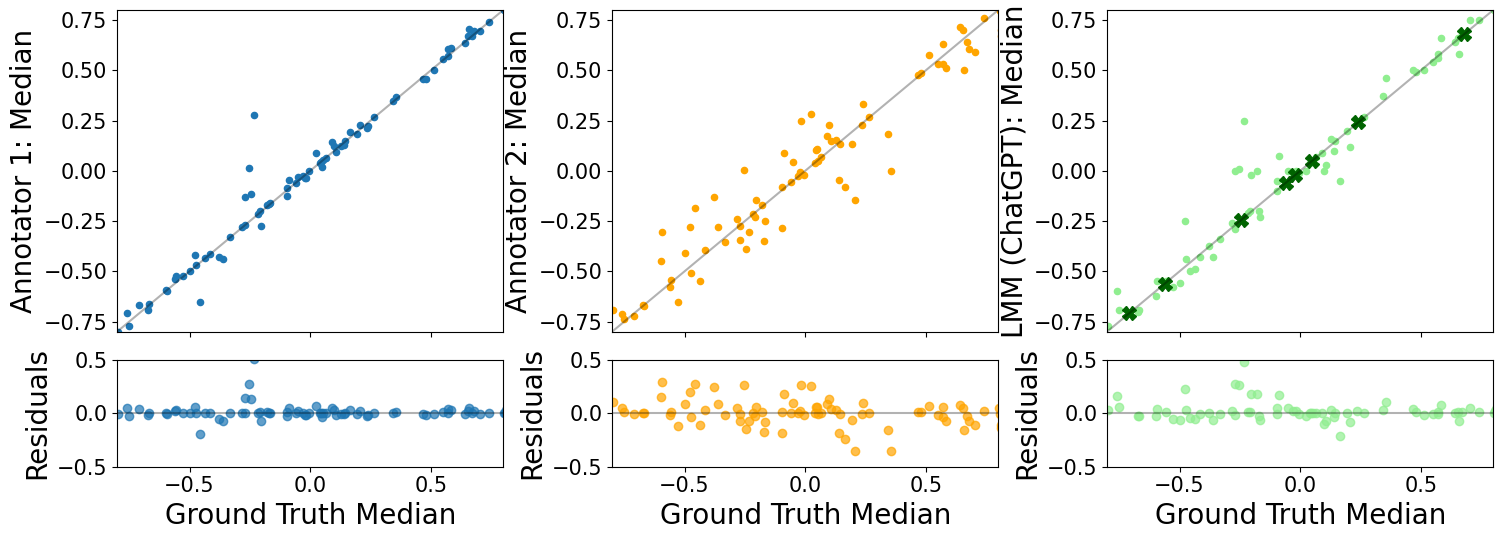

In [ ]:
llm_color = 'lightgreen'
a1_color = 'tab:blue'
a2_color = 'orange'

llm_error_color = 'darkgreen'
llm_error_marker_size = 10

equal_line_color = 'black'
equal_line_style = '-'
equal_line_alpha = 0.3

font_size_labels = 20
font_size_ticks = 15

# y-axis labels
yaxis_labels = ['Annotator 1: Median', 'Annotator 2: Median', 'LMM (ChatGPT): Median']

base = 5
# Create 2x3 subplots with shared x-axes
fig, ax = plt.subplots(2, 3, figsize=(base*3, base*1.1), 
                       gridspec_kw={'height_ratios': [3, 1]}, 
                       sharex='col')

############### ANNOTATOR 1 ###################

df_a1.plot(x='Ground Truth Median', y='Human median (draw)', kind='scatter', ax=ax[0,0], color=a1_color)

# Calculate and plot residuals for Annotator 1
residuals_a1 = df_a1['Human median (draw)'] - df_a1['Ground Truth Median']
residuals_a1 = residuals_a1.values
ax[1,0].scatter(df_a1['Ground Truth Median'], residuals_a1, color=a1_color, alpha=0.7)
ax[1,0].axhline(y=0, color=equal_line_color, linestyle=equal_line_style, alpha=equal_line_alpha)
ax[1,0].set_ylabel('Residuals', fontsize=font_size_labels)

############### ANNOTATOR 2 ###################

df_a2.plot(x='Ground Truth Median', y='Human median (draw)', kind='scatter', ax=ax[0,1], color=a2_color)

# Calculate and plot residuals for Annotator 2
residuals_a2 = df_a2['Human median (draw)'] - df_a2['Ground Truth Median']
residuals_a2 = residuals_a2.values
ax[1,1].scatter(df_a2['Ground Truth Median'], residuals_a2, color=a2_color, alpha=0.7)
ax[1,1].axhline(y=0, color=equal_line_color, linestyle=equal_line_style, alpha=equal_line_alpha)
ax[1,1].set_ylabel('Residuals', fontsize=font_size_labels)

##################### LLM #####################

df_allm.plot(x='Ground Truth Median', y='LLM Median', kind='scatter', color=llm_color, ax=ax[0,2])

# Calculate and plot residuals for LLM (excluding NaN values)
llm_residuals = []
llm_gt_values = []
for i in range(len(df_allm)):
    llmm = df_allm.iloc[i]['LLM Median']
    gtm = df_allm.iloc[i]['Ground Truth Median']
    try:
        llmm = float(llmm)
        if not np.isnan(llmm):
            llm_residuals.append(llmm - gtm)
            llm_gt_values.append(gtm)
    except:
        pass

# update
llm_residuals = np.array(llm_residuals)
ax[1,2].scatter(llm_gt_values, llm_residuals, color=llm_color, alpha=0.7)
ax[1,2].axhline(y=0, color=equal_line_color, linestyle=equal_line_style, alpha=equal_line_alpha)
ax[1,2].set_ylabel('Residuals', fontsize=font_size_labels)

# plot NaNs (only on main plot)
for i in range(len(df_allm)):
    llmm = df_allm.iloc[i]['LLM Median']
    try:
        llmm = float(llmm)
    except:
        print("FAILED:", llmm)
        llmm = np.nan
    try:
        if np.isnan(llmm):
            gtm = df_allm.iloc[i]['Ground Truth Median']
            ax[0,2].plot([gtm],[gtm], color=llm_error_color, marker='X', ms=llm_error_marker_size)
    except:
        pass

# Set limits and equal lines for main plots only
mxmin = -0.8
mxmax = 0.8
for i in range(3):  # Only for the top row (main plots)
    ax[0,i].set_ylim(mxmin, mxmax)
    ax[0,i].set_xlim(mxmin, mxmax)
    ax[0,i].plot([mxmin,mxmax], [mxmin,mxmax], color=equal_line_color, 
                 linestyle=equal_line_style, zorder=10, 
                 alpha=equal_line_alpha)
    ax[0,i].set_ylabel(yaxis_labels[i], fontsize=font_size_labels)

# Set limits and equal lines for resids plots only
mxminr = -0.5
mxmaxr = 0.5
for i in range(3):  # Only for the top row (main plots)
    ax[1,i].set_ylim(mxminr, mxmaxr)

# Set font sizes for all axes
for i in range(2):  # Both rows
    for j in range(3):  # All columns
        # Set tick label font sizes
        ax[i,j].tick_params(axis='both', which='major', labelsize=font_size_ticks)
        
        # Set x-axis label font size (only for bottom row)
        if i == 1:
            ax[i,j].set_xlabel('Ground Truth Median', fontsize=font_size_labels)

# Adjust layout to prevent overlapping
plt.tight_layout()

fig.savefig('~/Dropbox/Paper_JCDL2025/figures/relation_and_residuals.pdf')

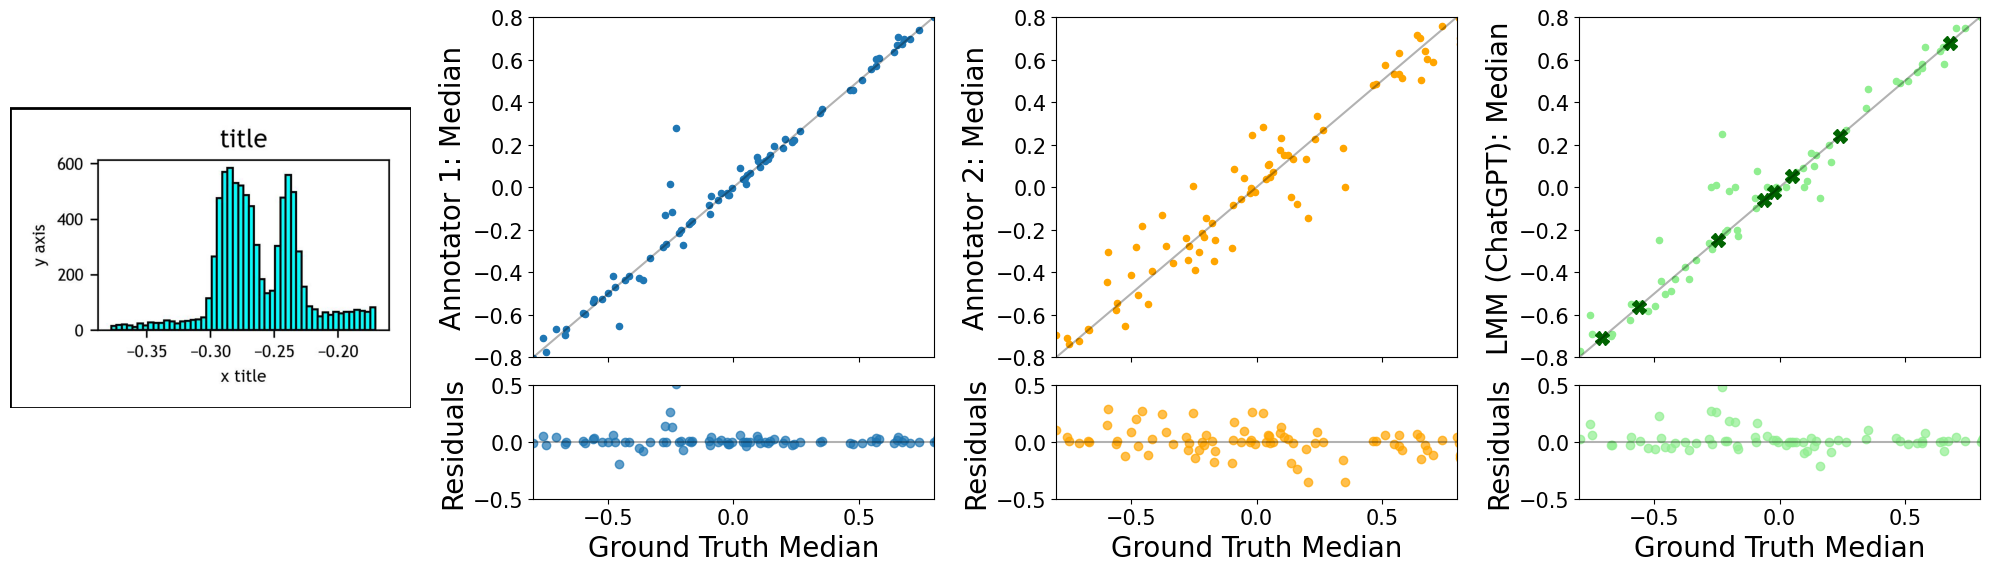

In [ ]:
llm_color = 'lightgreen'
a1_color = 'tab:blue'
a2_color = 'orange'

llm_error_color = 'darkgreen'
llm_error_marker_size = 10

equal_line_color = 'black'
equal_line_style = '-'
equal_line_alpha = 0.3

font_size_labels = 20
font_size_ticks = 15

# y-axis labels
yaxis_labels = ['Annotator 1: Median', 'Annotator 2: Median', 'LMM (ChatGPT): Median']

img_array = np.array(Image.open('./example_hists/imgs/id_0000.jpeg'))

base = 5
# Create figure with GridSpec for more control
fig = plt.figure(figsize=(base*4, base*1.15))  # Increased width for image
gs = fig.add_gridspec(2, 4, width_ratios=[1, 1, 1, 1], height_ratios=[3, 1])

# Create image subplot (spans both rows, first column)
ax_img = fig.add_subplot(gs[:, 0])  # Spans all rows, first column

# Create the 6 plotting subplots
ax = np.empty((2, 3), dtype=object)
for i in range(2):
    for j in range(3):
        ax[i, j] = fig.add_subplot(gs[i, j+1])  # j+1 to skip the image column

# Share x-axes within each column
for j in range(3):
    ax[1, j].sharex(ax[0, j])

######### Example image #############
ax_img.imshow(img_array) #, aspect='auto')
ax_img.axis('off')  # Remove axes for cleaner look
# Add black border by showing spines
# for spine in ax_img.spines.values():
#     spine.set_visible(True)
#     spine.set_color('black')
#     spine.set_linewidth(10)  # Adjust thickness as needed
# ax_img.spines['top'].set_visible(True)
# ax_img.spines['right'].set_visible(True)
# ax_img.spines['bottom'].set_visible(True)
# ax_img.spines['left'].set_visible(True)
from matplotlib.patches import Rectangle
height, width = img_array.shape[:2]  # Get image dimensions
rect = Rectangle((0, 0), width-1, height-1, linewidth=2, edgecolor='black', facecolor='none')
ax_img.add_patch(rect)

############### ANNOTATOR 1 ###################

df_a1.plot(x='Ground Truth Median', y='Human median (draw)', kind='scatter', ax=ax[0,0], color=a1_color)

# Calculate and plot residuals for Annotator 1
residuals_a1 = df_a1['Human median (draw)'] - df_a1['Ground Truth Median']
residuals_a1 = residuals_a1.values
ax[1,0].scatter(df_a1['Ground Truth Median'], residuals_a1, color=a1_color, alpha=0.7)
ax[1,0].axhline(y=0, color=equal_line_color, linestyle=equal_line_style, alpha=equal_line_alpha)
ax[1,0].set_ylabel('Residuals', fontsize=font_size_labels)

############### ANNOTATOR 2 ###################

df_a2.plot(x='Ground Truth Median', y='Human median (draw)', kind='scatter', ax=ax[0,1], color=a2_color)

# Calculate and plot residuals for Annotator 2
residuals_a2 = df_a2['Human median (draw)'] - df_a2['Ground Truth Median']
residuals_a2 = residuals_a2.values
ax[1,1].scatter(df_a2['Ground Truth Median'], residuals_a2, color=a2_color, alpha=0.7)
ax[1,1].axhline(y=0, color=equal_line_color, linestyle=equal_line_style, alpha=equal_line_alpha)
ax[1,1].set_ylabel('Residuals', fontsize=font_size_labels)

##################### LLM #####################

df_allm.plot(x='Ground Truth Median', y='LLM Median', kind='scatter', color=llm_color, ax=ax[0,2])

# Calculate and plot residuals for LLM (excluding NaN values)
llm_residuals = []
llm_gt_values = []
for i in range(len(df_allm)):
    llmm = df_allm.iloc[i]['LLM Median']
    gtm = df_allm.iloc[i]['Ground Truth Median']
    try:
        llmm = float(llmm)
        if not np.isnan(llmm):
            llm_residuals.append(llmm - gtm)
            llm_gt_values.append(gtm)
    except:
        pass

# update
llm_residuals = np.array(llm_residuals)
ax[1,2].scatter(llm_gt_values, llm_residuals, color=llm_color, alpha=0.7)
ax[1,2].axhline(y=0, color=equal_line_color, linestyle=equal_line_style, alpha=equal_line_alpha)
ax[1,2].set_ylabel('Residuals', fontsize=font_size_labels)

# plot NaNs (only on main plot)
for i in range(len(df_allm)):
    llmm = df_allm.iloc[i]['LLM Median']
    try:
        llmm = float(llmm)
    except:
        print("FAILED:", llmm)
        llmm = np.nan
    try:
        if np.isnan(llmm):
            gtm = df_allm.iloc[i]['Ground Truth Median']
            ax[0,2].plot([gtm],[gtm], color=llm_error_color, marker='X', ms=llm_error_marker_size)
    except:
        pass

# Set limits and equal lines for main plots only
mxmin = -0.8
mxmax = 0.8
for i in range(3):  # Only for the top row (main plots)
    ax[0,i].set_ylim(mxmin, mxmax)
    ax[0,i].set_xlim(mxmin, mxmax)
    ax[0,i].plot([mxmin,mxmax], [mxmin,mxmax], color=equal_line_color, 
                 linestyle=equal_line_style, zorder=10, 
                 alpha=equal_line_alpha)
    ax[0,i].set_ylabel(yaxis_labels[i], fontsize=font_size_labels)

# Set limits and equal lines for resids plots only
mxminr = -0.5
mxmaxr = 0.5
for i in range(3):  # Only for the bottom row (residuals plots)
    ax[1,i].set_ylim(mxminr, mxmaxr)

# Set font sizes for all axes
for i in range(2):  # Both rows
    for j in range(3):  # All columns
        # Set tick label font sizes
        ax[i,j].tick_params(axis='both', which='major', labelsize=font_size_ticks)
        
        # Set x-axis label font size (only for bottom row)
        if i == 1:
            ax[i,j].set_xlabel('Ground Truth Median', fontsize=font_size_labels)

# Adjust layout to prevent overlapping
plt.tight_layout()

fig.savefig('~/Dropbox/Paper_JCDL2025/figures/relation_and_residuals.pdf')

In [11]:
# not for plotting, but for testing mini

# Calculate and plot residuals for LLM (excluding NaN values)
llm_mini_residuals = []
llm_mini_gt_values = []
for i in range(len(df_allm)):
    llmm = df_allm.iloc[i]['LLM Median Mini']
    gtm = df_allm.iloc[i]['Ground Truth Median']
    try:
        llmm = float(llmm)
        if not np.isnan(llmm):
            llm_mini_residuals.append(llmm - gtm)
            llm_mini_gt_values.append(gtm)
    except:
        pass

# update
llm_mini_residuals = np.array(llm_mini_residuals)

## Calculation -- normalicy of residuals

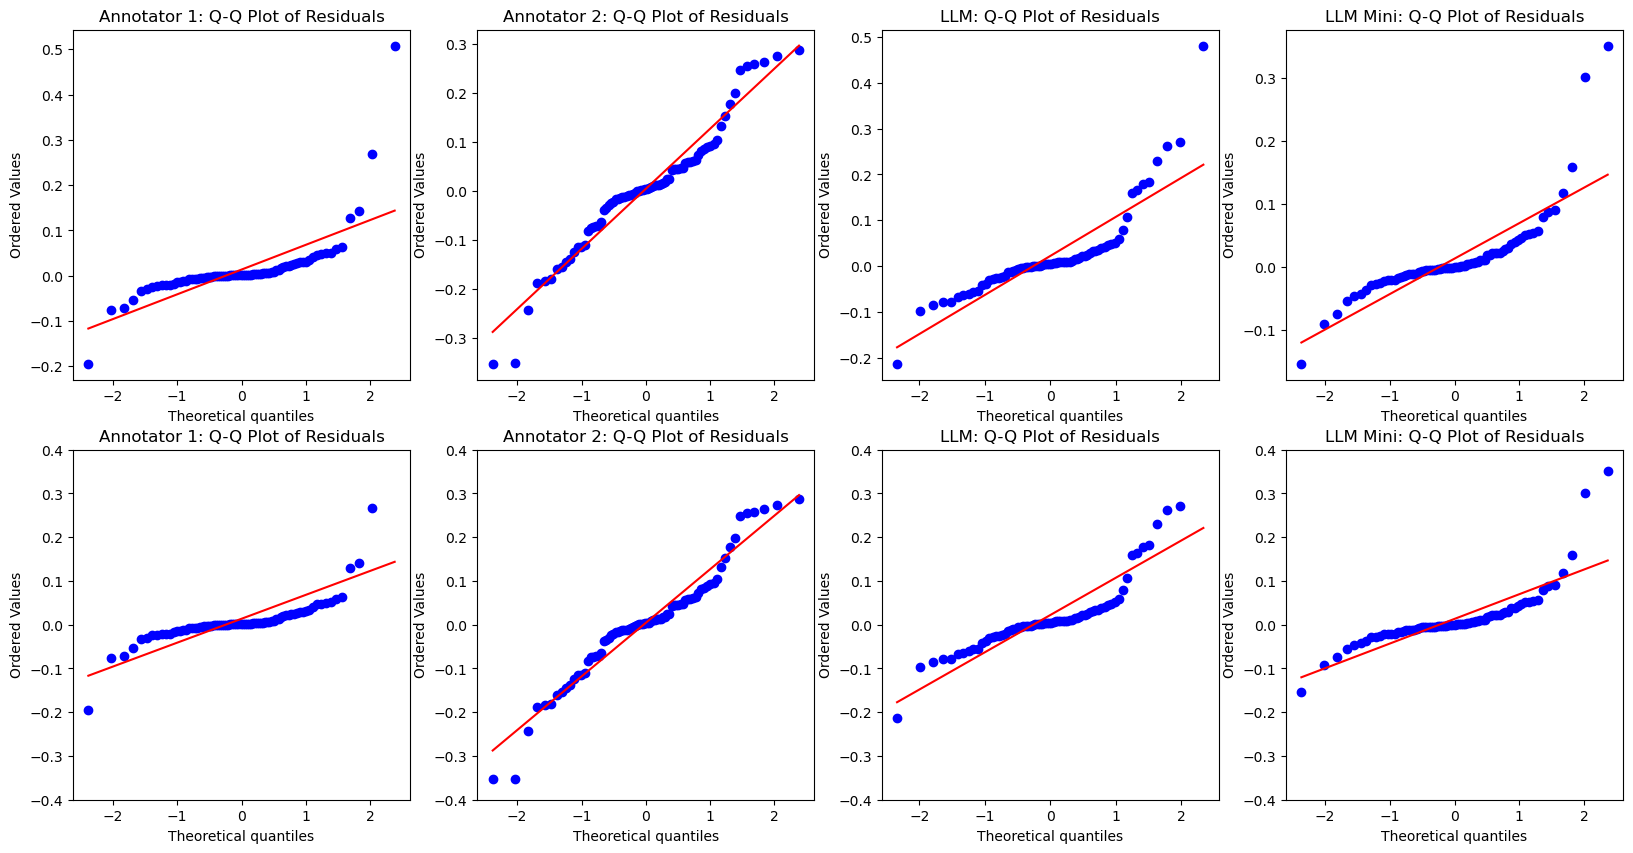

In [12]:
# Assuming 'residuals' is a list or array of your model's residuals
fig, axes = plt.subplots(2,4, figsize=(5*4,5*2))

for ax,res,name in zip(axes[0,:], [residuals_a1, residuals_a2, llm_residuals, llm_mini_residuals], ['Annotator 1', 'Annotator 2', 'LLM', 'LLM Mini']):
    stats.probplot(res, dist="norm", plot=ax)
    ax.set_title(name + ": Q-Q Plot of Residuals") 

# also with some limits
ymin,ymax = -0.4, 0.4
for ax,res,name in zip(axes[1,:], [residuals_a1, residuals_a2, llm_residuals, llm_mini_residuals], ['Annotator 1', 'Annotator 2', 'LLM', 'LLM Mini']):
    stats.probplot(res, dist="norm", plot=ax)
    ax.set_title(name + ": Q-Q Plot of Residuals")
    ax.set_ylim(ymin,ymax)
plt.show()

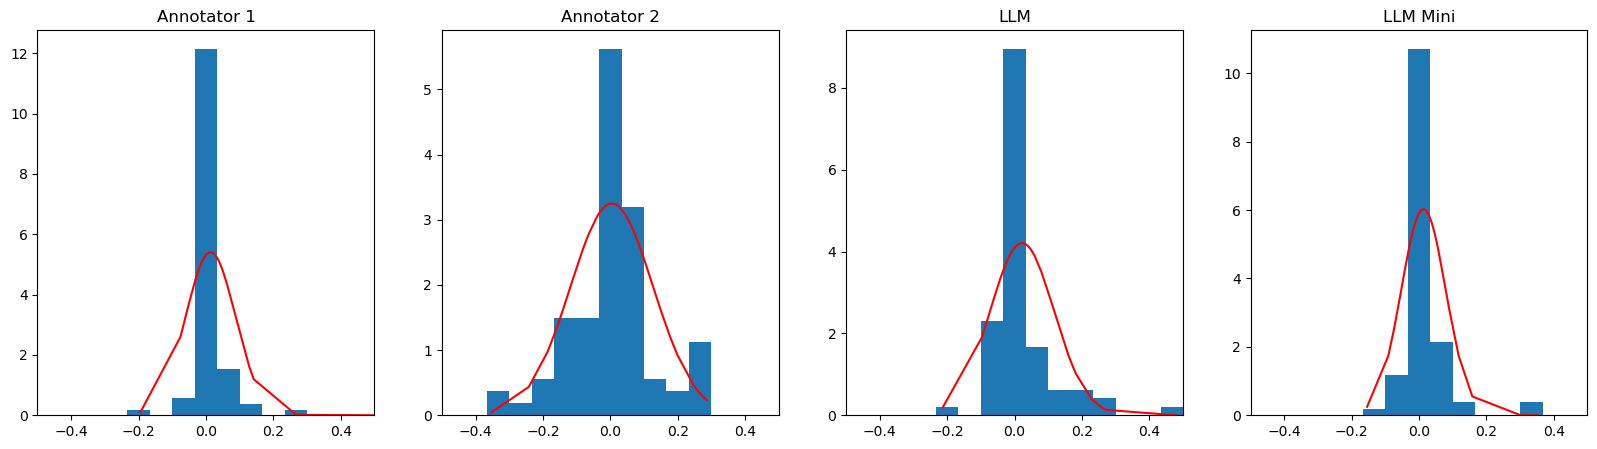

In [13]:
# plot actual distributions
fig, axes = plt.subplots(1,4, figsize=(5*4,5))
nbins = 15
mxmin = -0.5
mxmax = 0.5

bins = np.linspace(mxmin,mxmax,nbins+1)

for ax,res,name in zip(axes, [residuals_a1, residuals_a2, llm_residuals, llm_mini_residuals], ['Annotator 1', 'Annotator 2', 'LLM', 'LLM Mini']):
    ax.hist(res,bins=bins, density=True)
    ax.set_title(name)
    # overplot normal
    hmean = np.mean(res)
    hstd = np.std(res)
    pdf = stats.norm.pdf(res, hmean, hstd)
    rsort = np.argsort(res)
    ax.plot(res[rsort], pdf[rsort], 'r-')

    ax.set_xlim(mxmin,mxmax)

plt.show()

A few reminders to jog the memory about residuals: 
* https://www.youtube.com/watch?v=41l3AAV35zk
* https://www.datacamp.com/tutorial/qq-plot

Some "heavy tails" -- i.e. a bit more in the tails than in the middle, but also more peaked in the middle.  So an ANOVA test might be OK but maybe we also want to do something like a non-parametric, Kruskal-Wallis H-test, type test?

Let's do some actual tests for normalicy of residuals:


In [14]:
from scipy.stats import shapiro

for res,name in zip([residuals_a1, residuals_a2, llm_residuals], ['Annotator 1', 'Annotator 2', 'LLM']):
    # Assuming 'residuals' is a list or array of your model's residuals
    print('------ ' + name + ' --------')
    stat, p_value = shapiro(res)
    print(f"Shapiro-Wilk Test: Statistic={stat:.3f}, p-value={p_value:.3f}")

    if p_value > 0.05:  # Using a common significance level of 0.05
        print("Residuals are likely normally distributed (fail to reject H0)")
    else:
        print("Residuals are not normally distributed (reject H0)")

------ Annotator 1 --------
Shapiro-Wilk Test: Statistic=0.551, p-value=0.000
Residuals are not normally distributed (reject H0)
------ Annotator 2 --------
Shapiro-Wilk Test: Statistic=0.951, p-value=0.004
Residuals are not normally distributed (reject H0)
------ LLM --------
Shapiro-Wilk Test: Statistic=0.781, p-value=0.000
Residuals are not normally distributed (reject H0)


In [15]:
from scipy.stats import normaltest

for res,name in zip([residuals_a1, residuals_a2, llm_residuals], ['Annotator 1', 'Annotator 2', 'LLM']):
    print('------ ' + name + ' --------')
    # Assuming 'residuals' is a list or array of your model's residuals
    stat, p_value = normaltest(res)
    print(f"D'Agostino-Pearson Test: Statistic={stat:.3f}, p-value={p_value:.3f}")

    if p_value > 0.05:
        print("Residuals are likely normally distributed (fail to reject H0)")
    else:
        print("Residuals are not normally distributed (reject H0)")

------ Annotator 1 --------
D'Agostino-Pearson Test: Statistic=104.598, p-value=0.000
Residuals are not normally distributed (reject H0)
------ Annotator 2 --------
D'Agostino-Pearson Test: Statistic=3.877, p-value=0.144
Residuals are likely normally distributed (fail to reject H0)
------ LLM --------
D'Agostino-Pearson Test: Statistic=49.661, p-value=0.000
Residuals are not normally distributed (reject H0)


So, overall, probably definitely not normal, but based on the plots above, they are certainly normal-ish.  To be safe, let's do a non parametric test for a difference of medians (note -- not means here, medians).

In [46]:
from scipy.stats import kruskal

# Perform the Kruskal-Wallis H-test
h_statistic, p_value = kruskal(residuals_a1, residuals_a2, llm_residuals) #, llm_mini_residuals)

print(f"Kruskal-Wallis H-statistic: {h_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between group medians.")
else:
    print("Fail to reject the null hypothesis: No significant difference found between group medians.")

Kruskal-Wallis H-statistic: 0.15
P-value: 0.929
Fail to reject the null hypothesis: No significant difference found between group medians.


Let's also test the difference in varience -- i.e. do the variences differ from one another.  Let's use Levene's test since we have slightly non-normal distributions.

In [47]:
levene_stat = 'median'

#stat, p_lev = stats.levene(residuals_a1, residuals_a2, llm_residuals, llm_mini_residuals, center=levene_stat)
stat, p_lev = stats.levene(residuals_a1, residuals_a2, llm_residuals, center=levene_stat)
if p_lev < 0.05:
    print("Reject the null hypothesis: There is a significant difference between group variances.")
else:
    print("Fail to reject the null hypothesis: No significant difference found between group variances.")

Reject the null hypothesis: There is a significant difference between group variances.


Let's figure out which comparisons lead to the difference:

In [48]:
resids_compare = {'A1':residuals_a1, 'A2':residuals_a2, 'LLM':llm_residuals} #, 'LLM Mini':llm_mini_residuals}

pvalues_compare = {}
for l1,r1 in resids_compare.items():
    for l2,r2 in resids_compare.items():
        if l1 != l2:
            stat, p_lev = stats.levene(r1,r2, center=levene_stat)
            # make sure its not repeated
            if (l1+'-'+l2 not in pvalues_compare) and (l2+'-'+l1 not in pvalues_compare):
                pvalues_compare[l1+'-'+l2] = p_lev

In [49]:
pvalues_compare

{'A1-A2': 2.324255859313614e-05,
 'A1-LLM': 0.06104418808628284,
 'A2-LLM': 0.022654157709182783}

In [50]:
from statsmodels.stats.multitest import multipletests

# Example p-values from multiple pairwise Levene's tests
p_values = list(pvalues_compare.values()) #[0.01, 0.005, 0.03] # Example p-values from pairwise comparisons

# Apply Bonferroni-Holm correction
reject, pvals_corrected, alphac_sidak, alphac_bonf = multipletests(p_values, alpha=0.05, method='holm')

print('comparisons:', list(pvalues_compare.keys()))
difference = []
for r in reject:
    if r:
        difference.append("YES")
    else:
        difference.append("NO")
print(f"Significant difference?: {difference}")
print(f"Original P-values: {p_values}")
print(f"Holm-adjusted P-values: {pvals_corrected}")
print(f"Rejection decisions (Holm): {reject}")

print('In summary, differences in:', np.array(list(pvalues_compare.keys()))[np.array(reject)])

comparisons: ['A1-A2', 'A1-LLM', 'A2-LLM']
Significant difference?: ['YES', 'NO', 'YES']
Original P-values: [2.324255859313614e-05, 0.06104418808628284, 0.022654157709182783]
Holm-adjusted P-values: [6.97276758e-05 6.10441881e-02 4.53083154e-02]
Rejection decisions (Holm): [ True False  True]
In summary, differences in: ['A1-A2' 'A2-LLM']


So, it looks like the LLM and annotator 1 have around the same spread, while annotator 2 is the spread that is different from both of those.

## nGaussians

In [51]:
include_fewshot = False
include_mini = False

dfg = df.copy()[df['Ground Truth nBars'].isin([50])]
# make differences
diffa_g = np.abs(dfg['Ground Truth nGaussians']-dfg['Human nGaussians'])
diffl_g = np.abs(dfg['Ground Truth nGaussians']-dfg['LLM nGaussians (int)'])
if include_fewshot:
    difflfs_g = np.abs(dfg['Ground Truth nGaussians']-dfg['LLM nGaussians (int) FewShot'])
if include_mini:
    difflm_g = np.abs(dfg['Ground Truth nGaussians']-dfg['LLM nGaussians (int) Mini'])

dfg['Diff nGaussians (human)'] = diffa_g
dfg['Diff nGaussians (LLM)'] = diffl_g
if include_fewshot:
    dfg['Diff nGaussians (LLM) FewShot'] = difflfs_g
if include_mini:
    dfg['Diff nGaussians (LLM) Mini'] = difflm_g

da1_g = dfg[dfg['annotators']=='annotator1']
da2_g = dfg[dfg['annotators']=='annotator2']
dl_g = da1_g.copy()

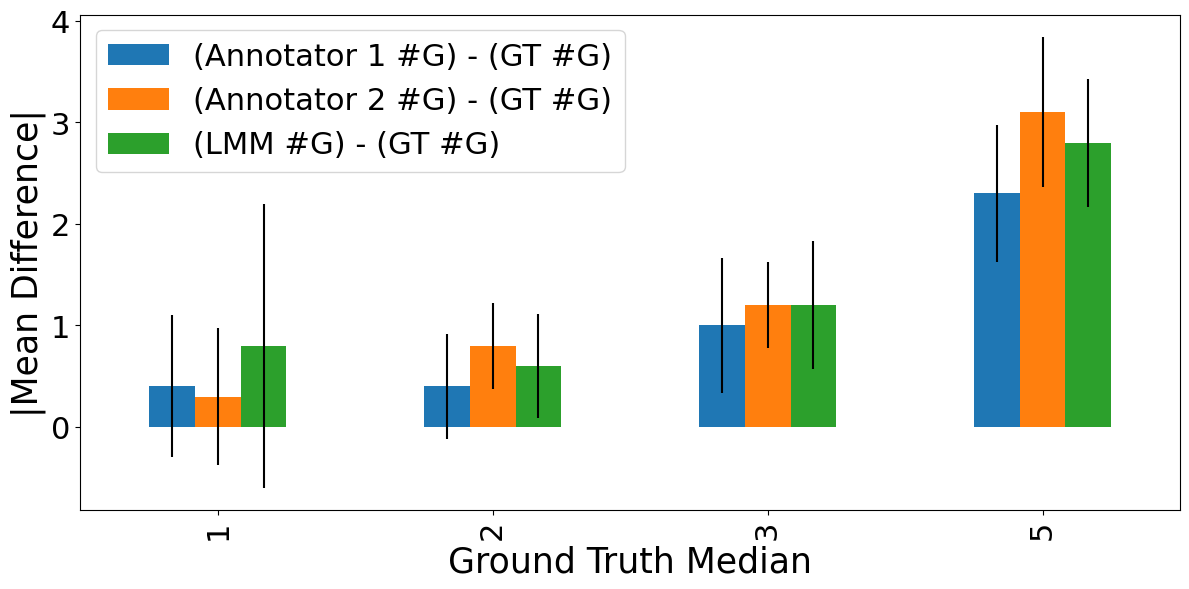

In [ ]:
font_size_labels = 25
font_size_ticks = 22
legend_fontsize = 22
base = 6


#### MEAN

# first annotator
b1_g2 = da1_g.groupby('Ground Truth nGaussians')['Diff nGaussians (human)'].mean().to_frame()
b1_g2 = b1_g2.rename(columns={'Diff nGaussians (human)':'Diff nGaussians (annotator1)'})
# 2nd annotator
b2_g2 = da2_g.groupby('Ground Truth nGaussians')['Diff nGaussians (human)'].mean().to_frame()
b2_g2 = b2_g2.rename(columns={'Diff nGaussians (human)':'Diff nGaussians (annotator2)'})
# 3rd annotator
bl_g2 = dl_g.groupby('Ground Truth nGaussians')['Diff nGaussians (LLM)'].mean().to_frame()
# 4th annotator
if include_fewshot:
    blfs_g2 = dl_g.groupby('Ground Truth nGaussians')['Diff nGaussians (LLM) FewShot'].mean().to_frame()
# 5th annotator = LLM with mini
if include_mini:
    blm_g2 = dl_g.groupby('Ground Truth nGaussians')['Diff nGaussians (LLM) Mini'].mean().to_frame()

arrays = [da1_g,da2_g,dl_g]
names = ['Diff nGaussians (human)','Diff nGaussians (human)','Diff nGaussians (LLM)']

dfb_g2 = b1_g2.join(b2_g2).join(bl_g2)
if include_fewshot:
    dfb_g2 = dfb_g2.join(blfs_g2)
    arrays.append(dl_g)
    names.append('Diff nGaussians (LLM) FewShot')
if include_mini:
    dfb_g2 = dfb_g2.join(blm_g2)
    arrays.append(dl_g)
    names.append('Diff nGaussians (LLM) Mini')
#dfb_bg2

errorbars_g2 = []
for arr,flag in zip(arrays,names):
    s = arr.groupby('Ground Truth nGaussians')[flag].std()
    errorbars_g2.append(s)


fig, ax = plt.subplots(figsize=(base*2.0,base))
dfb_g2.plot(kind='bar', yerr = errorbars_g2, ax=ax)
ax.legend(["(Annotator 1 #G) - (GT #G)", 
           "(Annotator 2 #G) - (GT #G)", 
           '(LMM #G) - (GT #G)'], 
           loc='upper left', fontsize=legend_fontsize)
ax.set_ylabel('|Mean Difference|', fontsize=font_size_labels)
ax.set_xlabel('GT #G', fontsize=font_size_labels)


# Set font sizes for all axes
ax.tick_params(axis='both', which='major', labelsize=font_size_ticks)
ax.set_xlabel('Ground Truth Median', fontsize=font_size_labels)

# Adjust layout to prevent overlapping
plt.tight_layout()

fig.savefig('~/Dropbox/Paper_JCDL2025/figures/mean_ngaussians.pdf')

For each gaussian # bin, is there a difference between group's measurements and the spread in measurement?

In [53]:
df.head(n=3)

,annotators,image file,Human nGaussians,Human median (number),Human median (draw),Ground Truth nGaussians,Ground Truth Median,Ground Truth nBars,LLM Median,LLM Median Mini,LLM nGaussians (int),LLM nGaussians (int) Mini
0,annotator1,id_0041.jpeg,1,0.055,0.055269,1,0.054428,50,0.055,0.050,1,1
1,annotator1,id_0014.jpeg,3,0.450,0.457472,1,0.478811,50,0.490,0.485,1,1
2,annotator1,id_0028.jpeg,2,-0.420,-0.415863,2,-0.417302,45,-0.430,-0.420,1,1


In [54]:
# Perform the Kruskal-Wallis H-test
significant_difference = []
bins = np.sort(dfg['Ground Truth nGaussians'].unique())
for bin_number in bins:
    print('---------- GAUSSIAN BIN: ', bin_number, ' ----------------------')
    dfsub = dfg[dfg['Ground Truth nGaussians']==bin_number]
    a1 = dfsub[dfsub['annotators']=='annotator1']
    a2 = dfsub[dfsub['annotators']=='annotator2']
    almm = a1.copy()

    h_statistic, p_value = kruskal(a1['Human nGaussians'], a2['Human nGaussians'], almm['LLM nGaussians (int)'])

    print(f"Kruskal-Wallis H-statistic: {h_statistic:.2f}")
    print(f"P-value: {p_value:.3f}")

    if p_value < 0.05:
        print("Reject the null hypothesis: There IS a significant difference between group medians.")
        significant_difference.append(True)
    else:
        print("Fail to reject the null hypothesis: No significant difference found between group medians.")
        significant_difference.append(False)

    print('')

---------- GAUSSIAN BIN:  1  ----------------------
Kruskal-Wallis H-statistic: 0.52
P-value: 0.771
Fail to reject the null hypothesis: No significant difference found between group medians.

---------- GAUSSIAN BIN:  2  ----------------------
Kruskal-Wallis H-statistic: 6.97
P-value: 0.031
Reject the null hypothesis: There IS a significant difference between group medians.

---------- GAUSSIAN BIN:  3  ----------------------
Kruskal-Wallis H-statistic: 0.72
P-value: 0.697
Fail to reject the null hypothesis: No significant difference found between group medians.

---------- GAUSSIAN BIN:  5  ----------------------
Kruskal-Wallis H-statistic: 5.56
P-value: 0.062
Fail to reject the null hypothesis: No significant difference found between group medians.



### Median difference between annotator & GT # of gaussians *per #GT bin*

If significant, do pairwise (note that the kruskalk-walis test is OK for discrete data as well):

In [55]:
for bin_number, sd in zip(bins, significant_difference):
    if not sd: continue

    print('---------- GAUSSIAN BIN: ', bin_number, ' ----------------------')
    dfsub = dfg[dfg['Ground Truth nGaussians']==bin_number]
    a1 = dfsub[dfsub['annotators']=='annotator1']['Human nGaussians']
    a2 = dfsub[dfsub['annotators']=='annotator2']['Human nGaussians']
    almm = dfsub[dfsub['annotators']=='annotator1']['LLM nGaussians (int)']

    comparisons = {'A1':a1, 'A2':a2, 'LLM':almm} #, 'LLM Mini':llm_mini_residuals}

    pvalues_compare = {}
    for l1,r1 in comparisons.items():
        for l2,r2 in comparisons.items():
            if l1 != l2:
                stat, p_lev = kruskal(r1,r2)
                # make sure its not repeated
                if (l1+'-'+l2 not in pvalues_compare) and (l2+'-'+l1 not in pvalues_compare):
                    pvalues_compare[l1+'-'+l2] = p_lev


    # Example p-values from multiple pairwise Levene's tests
    p_values = list(pvalues_compare.values()) #[0.01, 0.005, 0.03] # Example p-values from pairwise comparisons

    # Apply Bonferroni-Holm correction
    reject, pvals_corrected, alphac_sidak, alphac_bonf = multipletests(p_values, alpha=0.05, method='holm')

    print('comparisons:', list(pvalues_compare.keys()))
    difference = []
    for r in reject:
        if r:
            difference.append("YES")
        else:
            difference.append("NO")
    print(f"Significant difference?: {difference}")
    print(f"Original P-values: {p_values}")
    print(f"Holm-adjusted P-values: {pvals_corrected}")
    print(f"Rejection decisions (Holm): {reject}")



---------- GAUSSIAN BIN:  2  ----------------------
comparisons: ['A1-A2', 'A1-LLM', 'A2-LLM']
Significant difference?: ['NO', 'NO', 'NO']
Original P-values: [0.025239078018325343, 0.5641906924571178, 0.018339776479825612]
Holm-adjusted P-values: [0.05501933 0.56419069 0.05501933]
Rejection decisions (Holm): [False False False]


### Difference in variences

Actually, I think not as interesting for data that is already binned?  More interesting for medians since these can vary?

Let's calculate anyway?

Actually, levene's test shouldn't be used for discrete data so might need to thing of something else if we really want to test variances... probably OK to leave out since not sure it adds anything.

In [56]:
# for bin_number in bins:
#     print('---------- GAUSSIAN BIN: ', bin_number, ' ----------------------')
#     dfsub = df[df['Ground Truth nGaussians']==bin_number]
#     a1 = dfsub[dfsub['annotators']=='annotator1']['Human nGaussians']
#     a2 = dfsub[dfsub['annotators']=='annotator2']['Human nGaussians']
#     almm = dfsub[dfsub['annotators']=='annotator1']['LLM nGaussians (int)']

#     # test for significance
#     stat, p_lev = stats.levene(a1,a2,almm, center=levene_stat) ### UPDATE CALC

#     if p_lev < 0.05:
#         print("Reject the null hypothesis: There IS a significant difference between group variances.")
#     else:
#         print("Fail to reject the null hypothesis: No significant difference found between group variances.")   
#         continue 

#     comparisons = {'A1':a1, 'A2':a2, 'LLM':almm} #, 'LLM Mini':llm_mini_residuals}

#     pvalues_compare = {}
#     for l1,r1 in comparisons.items():
#         for l2,r2 in comparisons.items():
#             if l1 != l2:
#                 stat, p_lev = stats.levene(r1,r2, center=levene_stat) ### UPDATE CALC
#                 # make sure its not repeated
#                 if (l1+'-'+l2 not in pvalues_compare) and (l2+'-'+l1 not in pvalues_compare):
#                     pvalues_compare[l1+'-'+l2] = p_lev

#     # Example p-values from multiple pairwise Levene's tests
#     p_values = list(pvalues_compare.values()) #[0.01, 0.005, 0.03] # Example p-values from pairwise comparisons

#     # Apply Bonferroni-Holm correction
#     reject, pvals_corrected, alphac_sidak, alphac_bonf = multipletests(p_values, alpha=0.05, method='holm')

#     print('comparisons:', list(pvalues_compare.keys()))
#     difference = []
#     for r in reject:
#         if r:
#             difference.append("YES")
#         else:
#             difference.append("NO")
#     print(f"Significant difference?: {difference}")
#     print(f"Original P-values: {p_values}")
#     print(f"Holm-adjusted P-values: {pvals_corrected}")
#     print(f"Rejection decisions (Holm): {reject}")

### Does number of gaussians impact ability to guess number of gaussians?

Here want we want is a groupd linear regression I think, something like:

```
AccuracyRate = b0 + b1*GroundTruths + (1 | Participant)
```

So I think something like mixedlm in statsmodels:

```python
# Load example data (e.g., from statsmodels datasets)
data = sm.datasets.get_rdataset("dietox", "geepack").data

# Fit a mixed effects model
# "Weight ~ Time" defines the fixed effects
# "groups=data['Pig']" specifies the grouping variable for random effects
# "re_formula='~Time'" allows the slope for 'Time' to vary randomly by 'Pig'
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"], re_formula="~Time")
mdf = md.fit()

# Print the model summary
print(mdf.summary())
```

where `data` looks like;

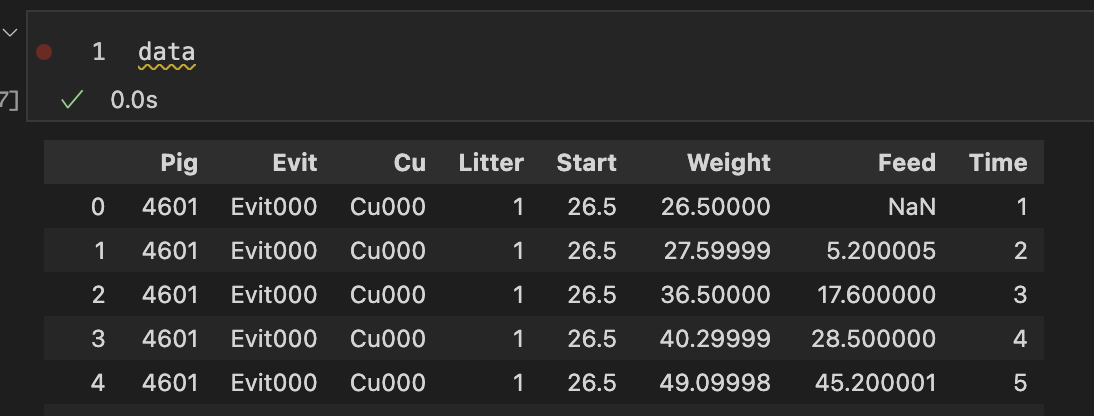

So, let's reformat data a bit:

In [57]:
dfg = df.copy()[df['Ground Truth nBars'].isin([50])]
# make differences
diffa_g = np.abs(dfg['Ground Truth nGaussians']-dfg['Human nGaussians'])
diffl_g = np.abs(dfg['Ground Truth nGaussians']-dfg['LLM nGaussians (int)'])
if include_fewshot:
    difflfs_g = np.abs(dfg['Ground Truth nGaussians']-dfg['LLM nGaussians (int) FewShot'])
if include_mini:
    difflm_g = np.abs(dfg['Ground Truth nGaussians']-dfg['LLM nGaussians (int) Mini'])

dfg['Diff nGaussians (human)'] = diffa_g
dfg['Diff nGaussians (LLM)'] = diffl_g
if include_fewshot:
    dfg['Diff nGaussians (LLM) FewShot'] = difflfs_g
if include_mini:
    dfg['Diff nGaussians (LLM) Mini'] = difflm_g

da1_g = dfg[dfg['annotators']=='annotator1']
da2_g = dfg[dfg['annotators']=='annotator2']
dl_g = da1_g.copy()
print(len(da1_g), len(da2_g), len(dl_g))

# reformat annotators
annotators = da1_g['annotators'].values
annotators = np.concatenate([da1_g['annotators'].values, da2_g['annotators'].values, np.repeat('LMM', len(dl_g))])

# reformat ngaussians
nGaussians = np.concatenate([da1_g['Ground Truth nGaussians'].values, da2_g['Ground Truth nGaussians'].values, dl_g['Ground Truth nGaussians'].values])

# reformat Differences
diffs = np.concatenate([da1_g['Diff nGaussians (human)'].values, da2_g['Diff nGaussians (human)'].values, dl_g['Diff nGaussians (LLM)'].values])

dfmr = pd.DataFrame({'annotator':annotators, 'Ground_Truth_nGaussians':nGaussians, 'Differences_in_nGaussians':diffs})

40 40 40


In [58]:
dfmr.head()

,annotator,Ground_Truth_nGaussians,Differences_in_nGaussians
0,annotator1,1,0
1,annotator1,1,2
2,annotator1,2,0
3,annotator1,1,0
4,annotator1,2,0


In [59]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

md = smf.mixedlm("Differences_in_nGaussians ~ Ground_Truth_nGaussians", dfmr, groups=dfmr["annotator"], re_formula="~Ground_Truth_nGaussians")
mdf = md.fit()

# Print the model summary
print(mdf.summary())

                    Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   Differences_in_nGaussians
No. Observations:    120       Method:               REML                     
No. Groups:          3         Scale:                0.5395                   
Min. group size:     40        Log-Likelihood:       -137.5029                
Max. group size:     40        Converged:            Yes                      
Mean group size:     40.0                                                     
------------------------------------------------------------------------------
                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------
Intercept                           -0.364    0.146 -2.500 0.012 -0.649 -0.079
Ground_Truth_nGaussians              0.584    0.063  9.232 0.000  0.460  0.708
Group Var                            0.003    0.122                      

/opt/anaconda3/envs/JCDL2025/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/JCDL2025/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/envs/JCDL2025/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/anaconda3/envs/JCDL2025/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


## Number of bars

Does this have any affect on the answers?

In [60]:
df.head(n=3)

,annotators,image file,Human nGaussians,Human median (number),Human median (draw),Ground Truth nGaussians,Ground Truth Median,Ground Truth nBars,LLM Median,LLM Median Mini,LLM nGaussians (int),LLM nGaussians (int) Mini
0,annotator1,id_0041.jpeg,1,0.055,0.055269,1,0.054428,50,0.055,0.050,1,1
1,annotator1,id_0014.jpeg,3,0.450,0.457472,1,0.478811,50,0.490,0.485,1,1
2,annotator1,id_0028.jpeg,2,-0.420,-0.415863,2,-0.417302,45,-0.430,-0.420,1,1


In [61]:
dfb = df.copy()[~df['Ground Truth nBars'].isin([50])]
# make differences
diffa_g = np.abs(dfb['Ground Truth Median']-dfb['Human median (draw)'])
diffl_g = np.abs(dfb['Ground Truth Median']-dfb['LLM Median'])
if include_fewshot:
    difflfs_g = np.abs(dfb['Ground Truth Median']-dfb['LLM Median FewShot'])
if include_mini:
    difflm_g = np.abs(dfb['Ground Truth Median']-dfb['LLM Median Mini'])

dfb['Diff Median (human)'] = diffa_g
dfb['Diff Median (LLM)'] = diffl_g
if include_fewshot:
    dfb['Diff Median (LLM) FewShot'] = difflfs_g
if include_mini:
    dfb['Diff Median (LLM) Mini'] = difflm_g

Do tests per bin:

In [62]:
bar_bins = np.sort(dfb['Ground Truth nBars'].unique())

test_on = 'medians of residuals'

for bin_number in bar_bins:
    print('---------- nBARS BIN: ', bin_number, ' ----------------------')
    dfsub = dfb[dfb['Ground Truth nBars']==bin_number]
    a1 = dfsub[dfsub['annotators']=='annotator1']['Human median (draw)']-dfsub[dfsub['annotators']=='annotator1']['Ground Truth Median']
    a2 = dfsub[dfsub['annotators']=='annotator2']['Human median (draw)']-dfsub[dfsub['annotators']=='annotator2']['Ground Truth Median']
    almm = dfsub[dfsub['annotators']=='annotator1']['LLM Median']-dfsub[dfsub['annotators']=='annotator1']['Ground Truth Median']

    # test for significance
    stat, p_lev = kruskal(a1,a2,almm)
    #stat, p_lev = stats.levene(a1,a2,almm, center=levene_stat) ### UPDATE CALC

    if p_lev < 0.05:
        print("Reject the null hypothesis: There IS a significant difference between group "+test_on+".")
    else:
        print("Fail to reject the null hypothesis: No significant difference found between group "+test_on+".")   
        continue 

    comparisons = {'A1':a1, 'A2':a2, 'LLM':almm} #, 'LLM Mini':llm_mini_residuals}

    pvalues_compare = {}
    for l1,r1 in comparisons.items():
        for l2,r2 in comparisons.items():
            if l1 != l2:
                #stat, p_lev = stats.levene(r1,r2, center=levene_stat) ### UPDATE CALC
                stat, p_lev = kruskal(r1,r2) ### UPDATE CALC
                # make sure its not repeated
                if (l1+'-'+l2 not in pvalues_compare) and (l2+'-'+l1 not in pvalues_compare):
                    pvalues_compare[l1+'-'+l2] = p_lev

    # Example p-values from multiple pairwise Levene's tests
    p_values = list(pvalues_compare.values()) #[0.01, 0.005, 0.03] # Example p-values from pairwise comparisons

    # Apply Bonferroni-Holm correction
    reject, pvals_corrected, alphac_sidak, alphac_bonf = multipletests(p_values, alpha=0.05, method='holm')

    print('comparisons:', list(pvalues_compare.keys()))
    difference = []
    for r in reject:
        if r:
            difference.append("YES")
        else:
            difference.append("NO")
    print(f"Significant difference?: {difference}")
    print(f"Original P-values: {p_values}")
    print(f"Holm-adjusted P-values: {pvals_corrected}")
    print(f"Rejection decisions (Holm): {reject}")

---------- nBARS BIN:  10  ----------------------
Fail to reject the null hypothesis: No significant difference found between group medians of residuals.
---------- nBARS BIN:  20  ----------------------
Fail to reject the null hypothesis: No significant difference found between group medians of residuals.
---------- nBARS BIN:  45  ----------------------
Fail to reject the null hypothesis: No significant difference found between group medians of residuals.
---------- nBARS BIN:  60  ----------------------
Fail to reject the null hypothesis: No significant difference found between group medians of residuals.


In [63]:
test_on = 'variance of residuals'

for bin_number in bar_bins:
    print('---------- nBARS BIN: ', bin_number, ' ----------------------')
    dfsub = dfb[dfb['Ground Truth nBars']==bin_number]
    a1 = dfsub[dfsub['annotators']=='annotator1']['Human median (draw)']-dfsub[dfsub['annotators']=='annotator1']['Ground Truth Median']
    a2 = dfsub[dfsub['annotators']=='annotator2']['Human median (draw)']-dfsub[dfsub['annotators']=='annotator2']['Ground Truth Median']
    almm = dfsub[dfsub['annotators']=='annotator1']['LLM Median']-dfsub[dfsub['annotators']=='annotator1']['Ground Truth Median']

    # test for significance
    #stat, p_lev = kruskal(a1,a2,almm)
    stat, p_lev = stats.levene(a1,a2,almm, center=levene_stat) ### UPDATE CALC

    if p_lev < 0.05:
        print("Reject the null hypothesis: There IS a significant difference between group "+test_on+".")
    else:
        print("Fail to reject the null hypothesis: No significant difference found between group "+test_on+".")   
        print('')
        continue 

    comparisons = {'A1':a1, 'A2':a2, 'LLM':almm} #, 'LLM Mini':llm_mini_residuals}

    pvalues_compare = {}
    for l1,r1 in comparisons.items():
        for l2,r2 in comparisons.items():
            if l1 != l2:
                stat, p_lev = stats.levene(r1,r2, center=levene_stat) ### UPDATE CALC
                #stat, p_lev = kruskal(r1,r2) ### UPDATE CALC
                # make sure its not repeated
                if (l1+'-'+l2 not in pvalues_compare) and (l2+'-'+l1 not in pvalues_compare):
                    pvalues_compare[l1+'-'+l2] = p_lev

    # Example p-values from multiple pairwise Levene's tests
    p_values = list(pvalues_compare.values()) #[0.01, 0.005, 0.03] # Example p-values from pairwise comparisons

    # Apply Bonferroni-Holm correction
    reject, pvals_corrected, alphac_sidak, alphac_bonf = multipletests(p_values, alpha=0.05, method='holm')

    print('comparisons:', list(pvalues_compare.keys()))
    difference = []
    for r in reject:
        if r:
            difference.append("YES")
        else:
            difference.append("NO")
    print(f"Significant difference?: {difference}")
    print(f"Original P-values: {p_values}")
    print(f"Holm-adjusted P-values: {pvals_corrected}")
    print(f"Rejection decisions (Holm): {reject}")
    print('')

---------- nBARS BIN:  10  ----------------------
Fail to reject the null hypothesis: No significant difference found between group variance of residuals.

---------- nBARS BIN:  20  ----------------------
Fail to reject the null hypothesis: No significant difference found between group variance of residuals.

---------- nBARS BIN:  45  ----------------------
Fail to reject the null hypothesis: No significant difference found between group variance of residuals.

---------- nBARS BIN:  60  ----------------------
Fail to reject the null hypothesis: No significant difference found between group variance of residuals.

